# Нормализация данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SkillBox/Feature_Processing/vehicles_dataset_upd5.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0,1.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0,0.0,0.0,0.0,0.0,1.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,reno,reno,volkswagen: golf r hatchback,4286,0,0.0,0.0,1.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,fayetteville,fayetteville,toyota: rav4,3241,0,0.0,0.0,1.0,0.0,0.0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0,0.0,0.0,0.0,0.0,1.0


Нормализация — это адаптация входных данных к заданному диапазону (обычно к [0…1] или [-1…1]).

Цели нормализации данных:

    сравнить признаки между собой;
    привести данные к нормальному распределению.

Стандартизация, или  Z-масштабирование — это преобразование данных на основе среднего значения (‌$\mu$) и стандартного отклонения (‌$\sigma$) вида $$x_{std} = \frac{x - \mu}{\sigma}$$

Стандартизация изменяет значение на осях на более близкие друг к другу, что позволяет модели качественнее обучаться.

In [4]:
# Стандартизация выполняется с помощью класса StandardScaler
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [5]:
#Идентифицировать параметры преобразования для двух признаков
std_scaler.fit(df[['odometer', 'price']])

StandardScaler()

In [6]:
#Вывести среднее значение выборки и дисперсию
print('Среднее:', std_scaler.mean_)
print('Дисперсия', std_scaler.var_)

Среднее: [95166.42894272 18014.65277056]
Дисперсия [3.93671714e+09 1.56199217e+08]


In [7]:
#Применить преобразование через стандартизацию с помощью transform,
# в котором из каждого значения сначала будет вычтено среднее,
#а затем результат поделен на стандартное отклонение (корень из дисперсии)
std_scaled = std_scaler.transform(df[['odometer', 'price']])
std_scaled

array([[-1.07938964,  2.95850859],
       [-0.56011477, -0.08582617],
       [-1.29286276,  1.40625632],
       ...,
       [ 0.87686817, -0.72168951],
       [-0.52951388,  1.11100834],
       [-0.94425163,  1.11820951]])

In [9]:
# добавили две новые колонки стандартизированных признаков
df[['std_scaled_odometer', 'std_scaled_price']] = std_scaled

In [10]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,manufacturer_model,desc_len,model_in_desc,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,std_scaled_odometer,std_scaled_price
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,ram: 2500 crew cab big horn,4482,0,1.0,0.0,0.0,0.0,0.0,-1.079390,2.958509
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,ford: explorer 4wd 4dr xlt,968,0,0.0,0.0,0.0,0.0,1.0,-0.560115,-0.085826
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,volkswagen: golf r hatchback,4286,0,0.0,0.0,1.0,0.0,0.0,-1.292863,1.406256
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,toyota: rav4,3241,0,0.0,0.0,1.0,0.0,0.0,0.352621,-0.281218
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,bmw: 1 series 128i coupe 2d,4851,0,0.0,0.0,0.0,0.0,1.0,-0.234311,-0.274017


Сравним оригинальные и стандартизированные признаки

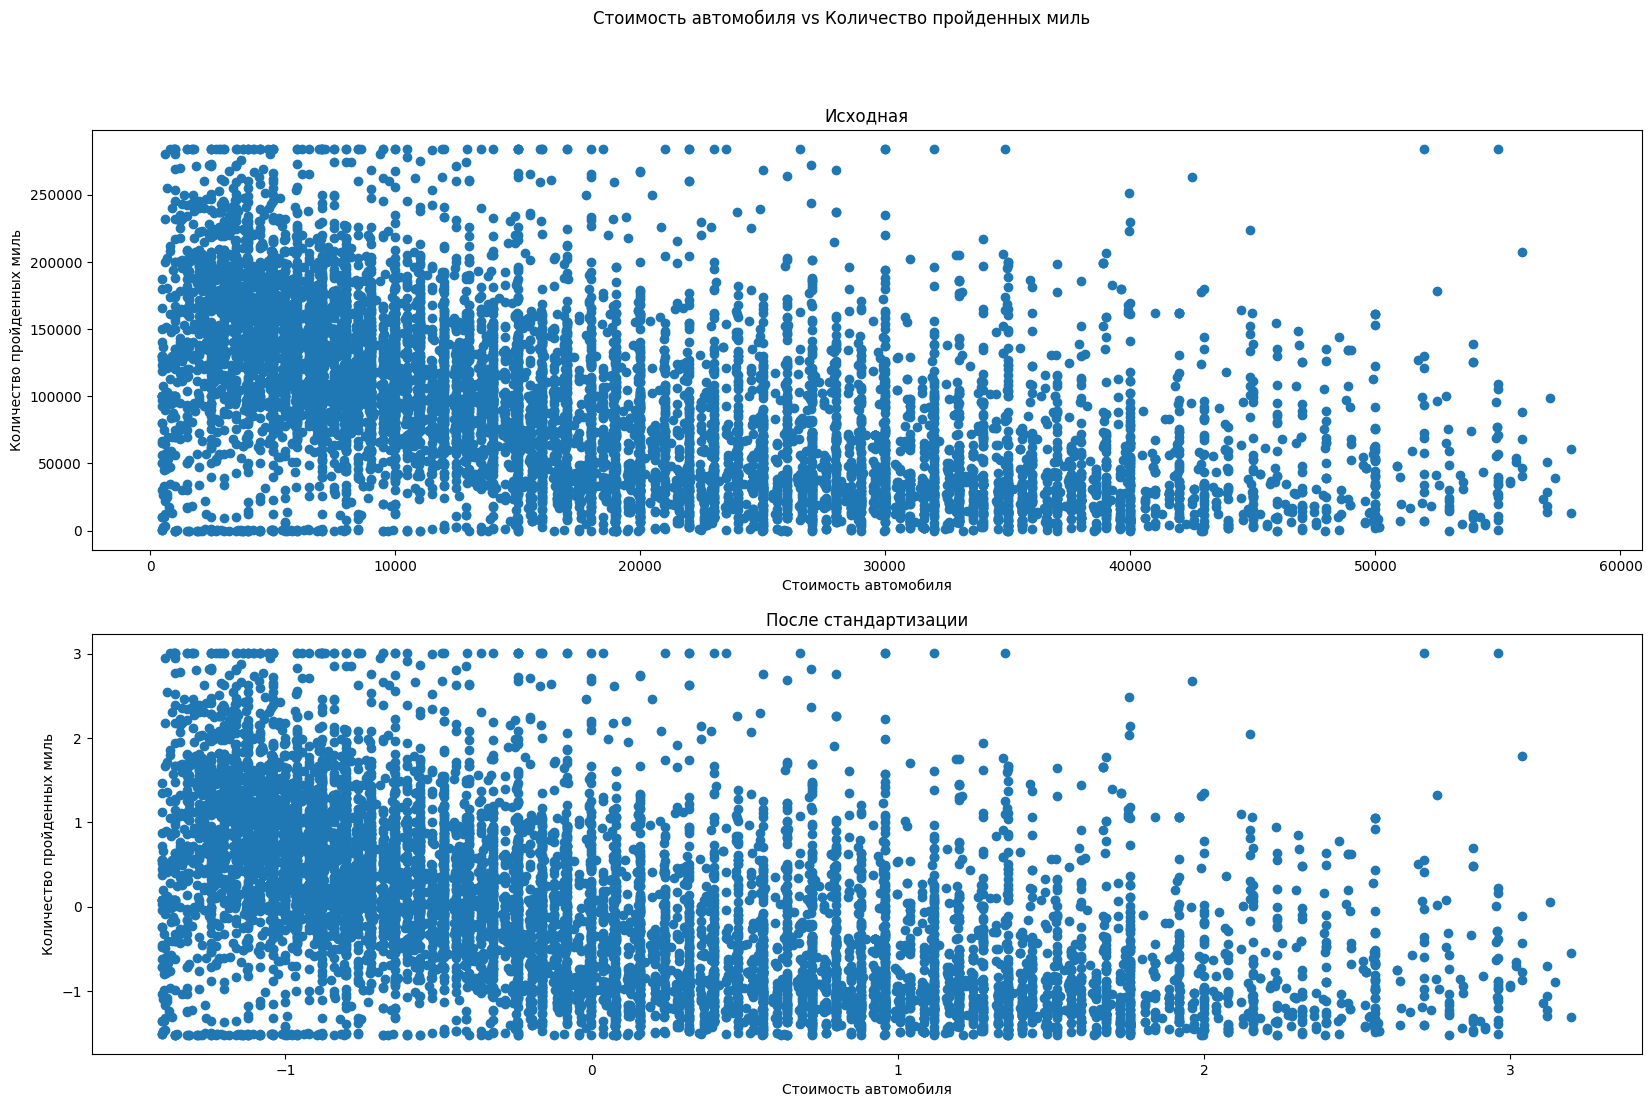

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

ax1.scatter(df.price, df.odometer)
ax1.set_title('Исходная')
ax1.set_ylabel('Количество пройденных миль')
ax1.set_xlabel('Стоимость автомобиля')


ax2.scatter(df.std_scaled_price, df.std_scaled_odometer)
ax2.set_title('После стандартизации')
ax2.set_ylabel('Количество пройденных миль')
ax2.set_xlabel('Стоимость автомобиля')

fig.suptitle('Стоимость автомобиля vs Количество пройденных миль');

Качественно графики идентичны. Единственное различие в масштабе осей.

In [12]:
# стандартизируем произвольные данные
std_scaler.transform([[50000, 30000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.71986101,  0.95898363]])

In [13]:
# сохраним изменения в файл
df.to_csv('/content/drive/MyDrive/SkillBox/Feature_Processing/vehicles_dataset_upd6.csv', index=False)